<div align="center">
<h1>ONLINE GAMING BEHAVIOURS PREDICTION </h1>
</div>
 

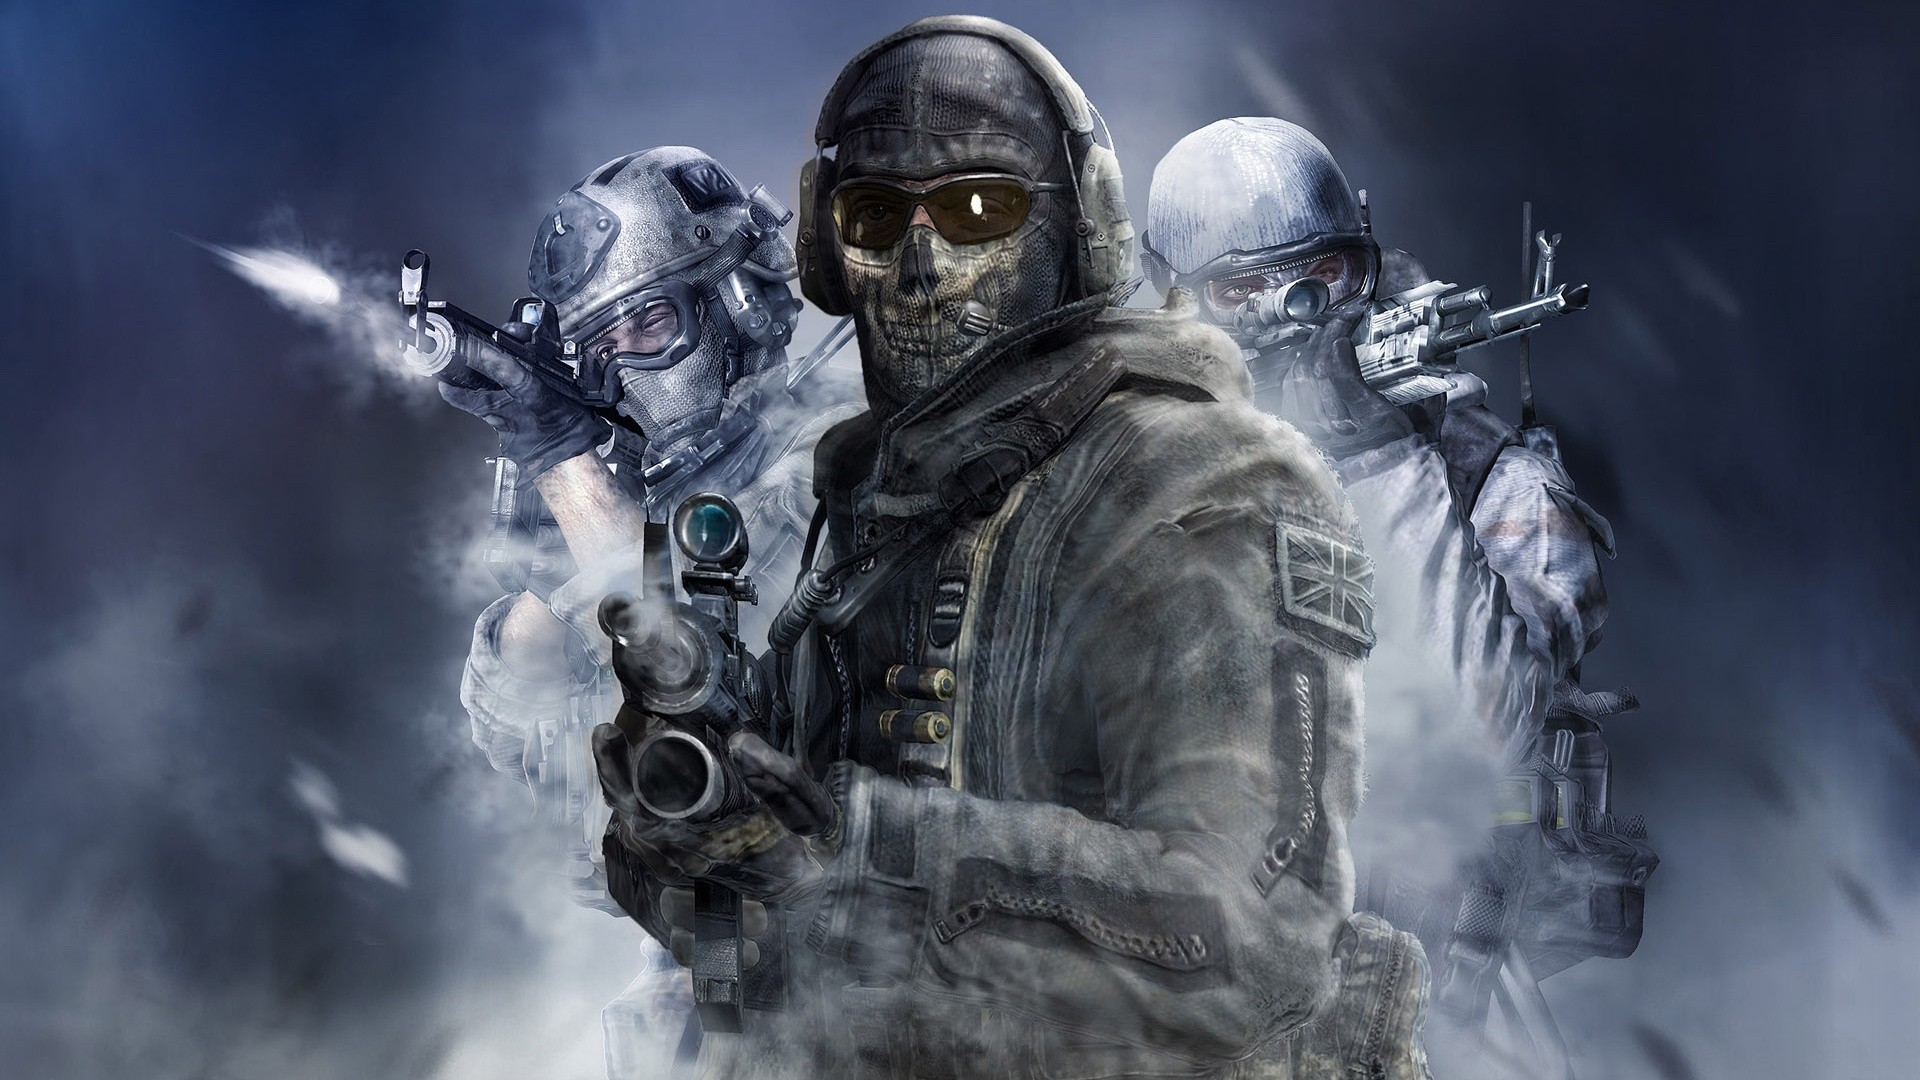

Overview:
This dataset captures comprehensive metrics and demographics related to player behavior in online gaming environments. It includes variables such as player demographics, game-specific details, engagement metrics, and a target variable reflecting player retention.

Features:
PlayerID: Unique identifier for each player.
Age: Age of the player.
Gender: Gender of the player.
Location: Geographic location of the player.
GameGenre: Genre of the game the player is engaged in.
PlayTimeHours: Average hours spent playing per session.
InGamePurchases: Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).
GameDifficulty: Difficulty level of the game.
SessionsPerWeek: Number of gaming sessions per week.
AvgSessionDurationMinutes: Average duration of each gaming session in minutes.
PlayerLevel: Current level of the player in the game.
AchievementsUnlocked: Number of achievements unlocked by the player.
EngagementLevel: Categorized engagement level reflecting player retention ('High', 'Medium', 'Low').
Target Variable:
EngagementLevel: Indicates the level of player engagement categorized as 'High', 'Medium', or 'Low'.
Potential Applications:
Predictive modeling of player retention and engagement patterns.
Analysis of factors influencing player behavior and game performance.
Optimization of game design, marketing strategies, and player experience enhancements.

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score

import joblib
import pickle


import warnings
warnings.filterwarnings('ignore')


In [4]:
# loading the dataset
game_df = pd.read_csv('online_gaming_behavior_dataset.csv')
game_df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


### Data Info

In [5]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag